In [660]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.metrics import mean_squared_error
import numpy as np
%matplotlib inline

In [661]:
telkom = pd.read_csv('/content/telkomtimeseries.csv', header = 1, parse_dates = [0], nrows = 20)
telkom = telkom.iloc[:, 1:]
telkom = telkom.rename(columns={telkom.columns[0]: 'Date'})
telkom['Date'] = pd.to_datetime(telkom['Date'].apply(lambda x: dt.strptime(x, '%b-%y')))
telkom = telkom.set_index('Date')
telkom

,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
Date,,,,
2020-01-01,199.94,300,128.21,200
2020-02-01,198.01,300,129.80,200
2020-03-01,197.19,300,124.44,200
2020-04-01,206.93,300,127.55,200
2020-05-01,228.66,400,130.25,200
2020-06-01,236.45,400,133.02,200
2020-07-01,240.90,400,132.24,200
2020-08-01,248.15,400,137.00,200
2020-09-01,253.59,400,144.85,200


In [662]:
telkomtest = pd.read_csv('/content/telkomtimeseries.csv', header = 1, parse_dates = [0])
telkomtest = telkomtest.iloc[:, 1:]
telkomtest = telkomtest.rename(columns={telkomtest.columns[0]: 'Date'})
telkomtest['Date'] = pd.to_datetime(telkomtest['Date'].apply(lambda x: dt.strptime(x, '%b-%y')))
telkomtest = telkomtest[20:]
telkomtest = telkomtest.set_index('Date')
telkomtest['Capacity 1'] = 0
telkomtest['Capacity 1'] = telkomtest['Capacity 1'].astype(int)
telkomtest['Capacity 2'] = 0
telkomtest['Capacity 2'] = telkomtest['Capacity 2'].astype(int)
telkomtest

,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
Date,,,,
2021-09-01,-,0,-,0
2021-10-01,-,0,-,0
2021-11-01,-,0,-,0
2021-12-01,-,0,-,0
2022-01-01,-,0,-,0
2022-02-01,-,0,-,0
2022-03-01,-,0,-,0
2022-04-01,-,0,-,0


In [663]:
link1 = telkom.iloc[:, 0]
series_link1 = link1.values
link2 = telkom.iloc[:, 2]
series_link2 = link2.values

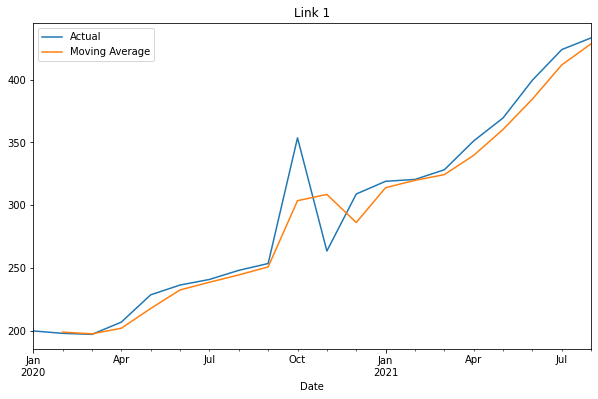

In [664]:
link1.plot(legend=True, label = 'Actual', figsize=(10,6))
link1.rolling(2).mean().plot(legend=True, label = 'Moving Average')
plt.title('Link 1')
plt.show()

In [665]:
link1df = pd.concat([link1, link1.shift(1)], axis=1)
link1df.columns = ['Actual', 'Series+1']
link1df = link1df[1:]
link2df = pd.concat([link2, link2.shift(1)], axis=1)
link2df.columns = ['Actual', 'Series+1']
link2df = link2df[1:]

In [666]:
link1error = mean_squared_error(link1df[17:].Actual, link1df['Series+1'][17:])
np.sqrt(link1error)

18.417911119342488

In [667]:
from statsmodels.tsa.holtwinters import Holt

In [668]:
link1_train = series_link1[:18]
link1_test = series_link1[18:]
link2_train = series_link2[:18]
link2_test = series_link2[18:]

In [669]:
model1 = Holt(endog=link1_train).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [670]:
predictions1 = model1.forecast(steps = 10)

In [671]:
predictions1

array([398.27797598, 413.42759326, 428.57721053, 443.72682781,
       458.87644509, 474.02606237, 489.17567964, 504.32529692,
       519.4749142 , 534.62453147])

In [672]:
np.sqrt(mean_squared_error(link1_test, predictions1[:2]))

22.884887844448077

In [673]:
testpred = telkom.copy()[18:]
testpred['MaxUtil Link 1'] = predictions1[:2]
testpred

,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
Date,,,,
2021-07-01,398.277976,600,257.92,400
2021-08-01,413.427593,600,266.44,400


In [674]:
telkomtest['MaxUtil Link 1'] = predictions1[2:]
telkomtest

,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
Date,,,,
2021-09-01,428.577211,0,-,0
2021-10-01,443.726828,0,-,0
2021-11-01,458.876445,0,-,0
2021-12-01,474.026062,0,-,0
2022-01-01,489.175680,0,-,0
2022-02-01,504.325297,0,-,0
2022-03-01,519.474914,0,-,0
2022-04-01,534.624531,0,-,0


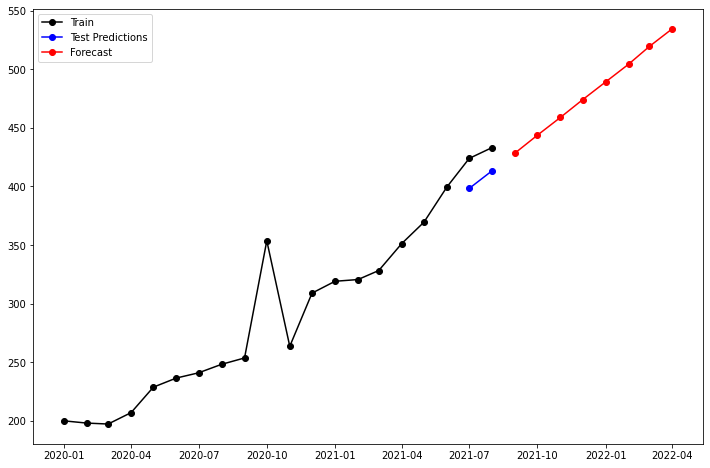

In [675]:
plt.figure(figsize=(12, 8))
plt.plot(link1, marker="o", color="black", label = 'Train')
plt.plot(testpred['MaxUtil Link 1'], marker = 'o', color="blue", label = 'Test Predictions')
plt.plot(telkomtest['MaxUtil Link 1'], marker = 'o', color="red", label = 'Forecast')
plt.legend()

# Normalizing irregularity

In [676]:
telkomnorm = telkom.copy()
telkomnorm['MaxUtil Link 1'][9] = (telkomnorm['MaxUtil Link 1'][8]+telkomnorm['MaxUtil Link 1'][10])/2
telkomnorm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
Date,,,,
2020-01-01,199.940,300,128.21,200
2020-02-01,198.010,300,129.80,200
2020-03-01,197.190,300,124.44,200
2020-04-01,206.930,300,127.55,200
2020-05-01,228.660,400,130.25,200
2020-06-01,236.450,400,133.02,200
2020-07-01,240.900,400,132.24,200
2020-08-01,248.150,400,137.00,200
2020-09-01,253.590,400,144.85,200


In [677]:
link1norm = telkomnorm.iloc[:, 0]
series_link1norm = link1norm.values

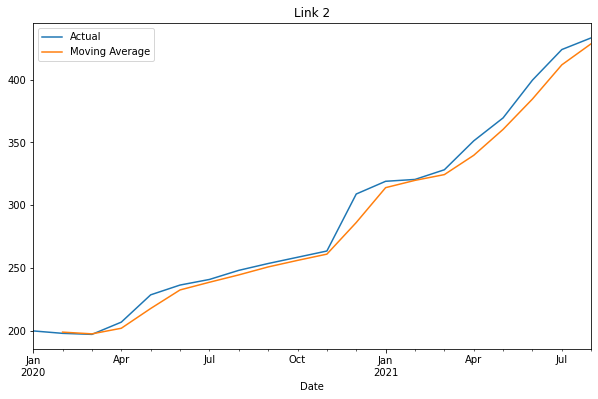

In [678]:
link1norm.plot(legend=True, label = 'Actual', figsize=(10,6))
link1norm.rolling(2).mean().plot(legend=True, label = 'Moving Average')
plt.title('Link 2')
plt.show()

In [679]:
link1dfnorm = pd.concat([link1norm, link1norm.shift(1)], axis=1)
link1dfnorm.columns = ['Actual', 'Series+1']
link1dfnorm = link1dfnorm[1:]
link1dfnorm

,Actual,Series+1
Date,,
2020-02-01,198.010,199.940
2020-03-01,197.190,198.010
2020-04-01,206.930,197.190
2020-05-01,228.660,206.930
2020-06-01,236.450,228.660
2020-07-01,240.900,236.450
2020-08-01,248.150,240.900
2020-09-01,253.590,248.150
2020-10-01,258.565,253.590


In [680]:
np.sqrt(mean_squared_error(link1dfnorm[17:].Actual, link1dfnorm['Series+1'][17:]))

18.417911119342488

In [681]:
link1_train = series_link1norm[:18]
link1_test = series_link1norm[18:]
model1 = Holt(endog=link1_train).fit()
predictions1 = model1.forecast(steps = 10)
np.sqrt(mean_squared_error(link1_test, predictions1[:2]))

11.431035333104045

In [682]:
testprednorm = telkomnorm.copy()[18:]
testprednorm['MaxUtil Link 1'] = predictions1[:2]
testprednorm

,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
Date,,,,
2021-07-01,411.312942,600,257.92,400
2021-08-01,423.055883,600,266.44,400


In [683]:
telkomtestnorm = telkomtest.copy()
telkomtestnorm['MaxUtil Link 1'] = predictions1[2:]
telkomtestnorm

,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
Date,,,,
2021-09-01,434.798825,0,-,0
2021-10-01,446.541767,0,-,0
2021-11-01,458.284709,0,-,0
2021-12-01,470.027650,0,-,0
2022-01-01,481.770592,0,-,0
2022-02-01,493.513534,0,-,0
2022-03-01,505.256475,0,-,0
2022-04-01,516.999417,0,-,0


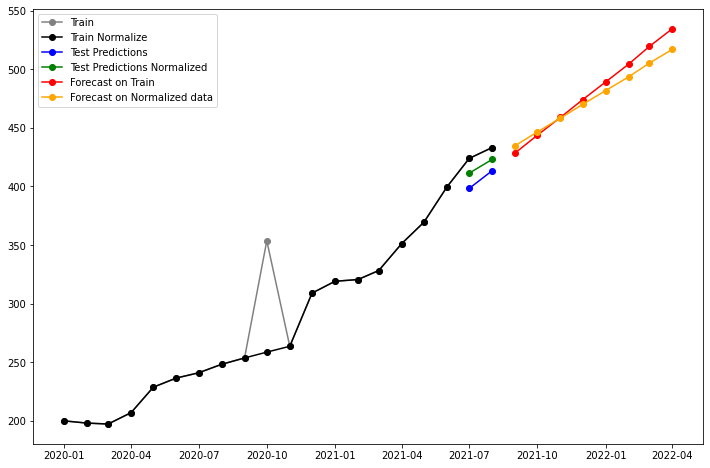

In [684]:
plt.figure(figsize=(12, 8))
plt.plot(link1, marker="o", color="gray", label = 'Train')
plt.plot(link1norm, marker="o", color="black", label = 'Train Normalize')
plt.plot(testpred['MaxUtil Link 1'], marker = 'o', color="blue", label = 'Test Predictions')
plt.plot(testprednorm['MaxUtil Link 1'], marker = 'o', color="green", label = 'Test Predictions Normalized')
plt.plot(telkomtest['MaxUtil Link 1'], marker = 'o', color="red", label = 'Forecast on Train')
plt.plot(telkomtestnorm['MaxUtil Link 1'], marker = 'o', color="orange", label = 'Forecast on Normalized data')
plt.legend()

In [685]:
model1s = Holt(endog=series_link1[11:]).fit()
predictions1s = model1s.forecast(steps = 8)
telkomtestcut = telkomtest.copy()
telkomtestcut['MaxUtil Link 1'] = predictions1s

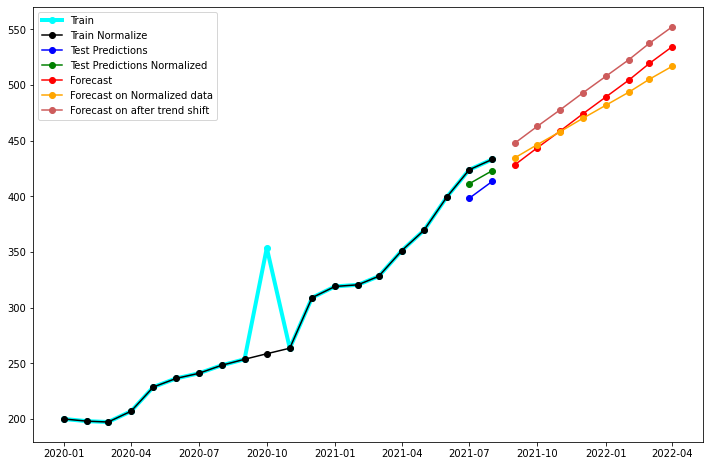

In [686]:
plt.figure(figsize=(12, 8))
plt.plot(link1, marker="o", color="cyan", label = 'Train', linewidth=4)
plt.plot(link1norm, marker="o", color="black", label = 'Train Normalize')
plt.plot(testpred['MaxUtil Link 1'], marker = 'o', color="blue", label = 'Test Predictions')
plt.plot(testprednorm['MaxUtil Link 1'], marker = 'o', color="green", label = 'Test Predictions Normalized')
plt.plot(telkomtest['MaxUtil Link 1'], marker = 'o', color="red", label = 'Forecast')
plt.plot(telkomtestnorm['MaxUtil Link 1'], marker = 'o', color="orange", label = 'Forecast on Normalized data')
plt.plot(telkomtestcut['MaxUtil Link 1'], marker = 'o', color="indianred", label = 'Forecast on after trend shift')
plt.legend()

In [687]:
model1final = Holt(endog=series_link1norm).fit()
predictions1final = model1final.forecast(steps = 8)
telkomtestfinal = telkomtest.copy()
telkomtestfinal['MaxUtil Link 1'] = predictions1final

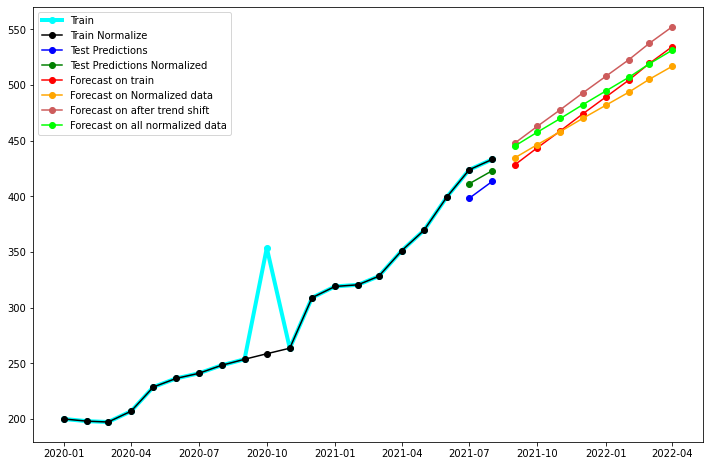

In [688]:
plt.figure(figsize=(12, 8))
plt.plot(link1, marker="o", color="cyan", label = 'Train', linewidth=4)
plt.plot(link1norm, marker="o", color="black", label = 'Train Normalize')
plt.plot(testpred['MaxUtil Link 1'], marker = 'o', color="blue", label = 'Test Predictions')
plt.plot(testprednorm['MaxUtil Link 1'], marker = 'o', color="green", label = 'Test Predictions Normalized')
plt.plot(telkomtest['MaxUtil Link 1'], marker = 'o', color="red", label = 'Forecast on train')
plt.plot(telkomtestnorm['MaxUtil Link 1'], marker = 'o', color="orange", label = 'Forecast on Normalized data')
plt.plot(telkomtestcut['MaxUtil Link 1'], marker = 'o', color="indianred", label = 'Forecast on after trend shift')
plt.plot(telkomtestfinal['MaxUtil Link 1'], marker = 'o', color="lime", label = 'Forecast on all normalized data')
plt.legend()

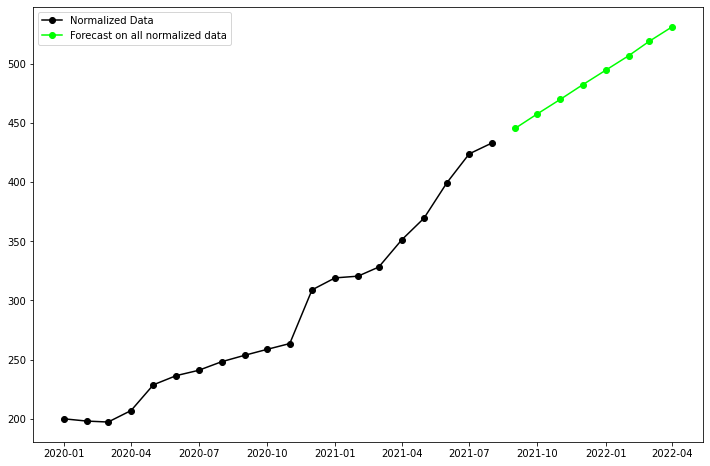

In [689]:
plt.figure(figsize=(12, 8))
plt.plot(link1norm, marker="o", color="black", label = 'Normalized Data')
plt.plot(telkomtestfinal['MaxUtil Link 1'], marker = 'o', color="lime", label = 'Forecast on all normalized data')
plt.legend()

In [690]:
telkom['MaxUtil Link 1'] = link1norm

# Link 1 Done

# Link 2

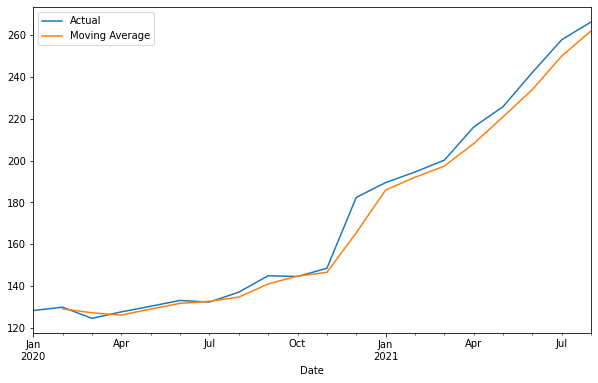

In [691]:
link2.plot(legend=True, label = 'Actual', figsize=(10,6))
link2.rolling(2).mean().plot(legend=True, label = 'Moving Average')
plt.show()

In [692]:
link2error = mean_squared_error(link2df[17:].Actual, link2df['Series+1'][17:])
np.sqrt(link2error)

12.593649193144936

In [693]:
model2 = Holt(endog=link2_train).fit()
predictions2 = model2.forecast(steps = 10)
np.sqrt(mean_squared_error(link2_test, predictions2[:2]))

3.751421316311994

In [694]:
testpred['MaxUtil Link 2'] = predictions2[:2]
testpred

,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
Date,,,,
2021-07-01,398.277976,600,252.861166,400
2021-08-01,413.427593,600,264.841713,400


In [695]:
telkomtest['MaxUtil Link 2'] = predictions2[2:]
telkomtest

,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
Date,,,,
2021-09-01,428.577211,0,276.822261,0
2021-10-01,443.726828,0,288.802808,0
2021-11-01,458.876445,0,300.783355,0
2021-12-01,474.026062,0,312.763903,0
2022-01-01,489.175680,0,324.744450,0
2022-02-01,504.325297,0,336.724998,0
2022-03-01,519.474914,0,348.705545,0
2022-04-01,534.624531,0,360.686092,0


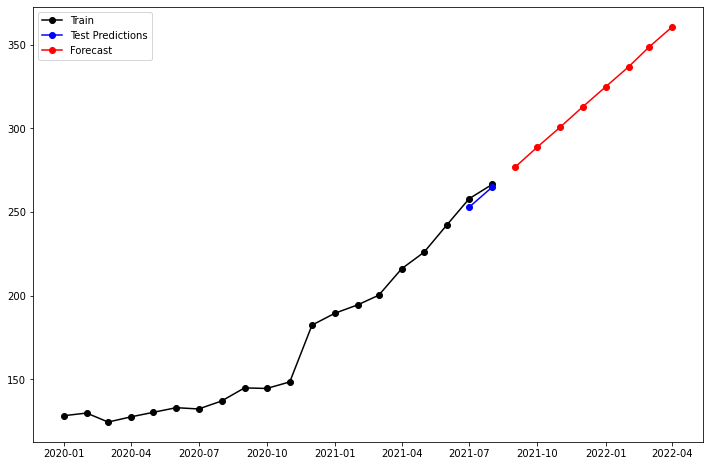

In [696]:
plt.figure(figsize=(12, 8))
plt.plot(link2, marker="o", color="black", label = 'Train')
plt.plot(testpred['MaxUtil Link 2'], marker = 'o', color="blue", label = 'Test Predictions')
plt.plot(telkomtest['MaxUtil Link 2'], marker = 'o', color="red", label = 'Forecast')
plt.legend()

In [697]:
model2s = Holt(endog=series_link2[12:]).fit()
predictions2s = model2s.forecast(steps = 8)
telkomtestcut['MaxUtil Link 2'] = predictions2s

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


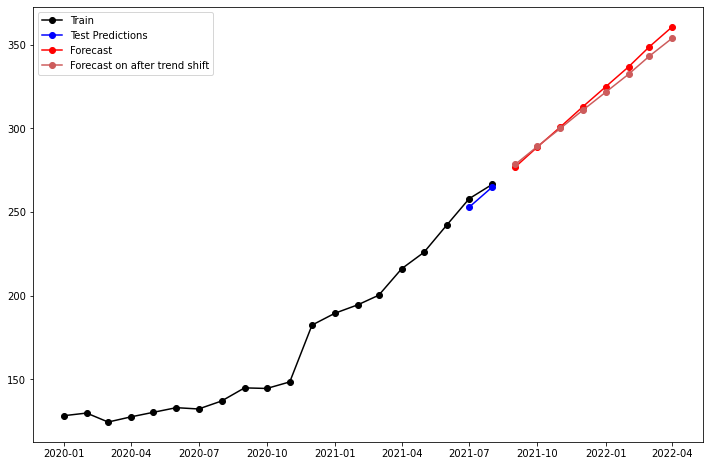

In [698]:
plt.figure(figsize=(12, 8))
plt.plot(link2, marker="o", color="black", label = 'Train')
plt.plot(testpred['MaxUtil Link 2'], marker = 'o', color="blue", label = 'Test Predictions')
plt.plot(telkomtest['MaxUtil Link 2'], marker = 'o', color="red", label = 'Forecast')
plt.plot(telkomtestcut['MaxUtil Link 2'], marker = 'o', color="indianred", label = 'Forecast on after trend shift')
plt.legend()

In [699]:
model2final = Holt(endog=series_link2).fit()
predictions2final = model2final.forecast(steps = 8)
telkomtestfinal['MaxUtil Link 2'] = predictions2final

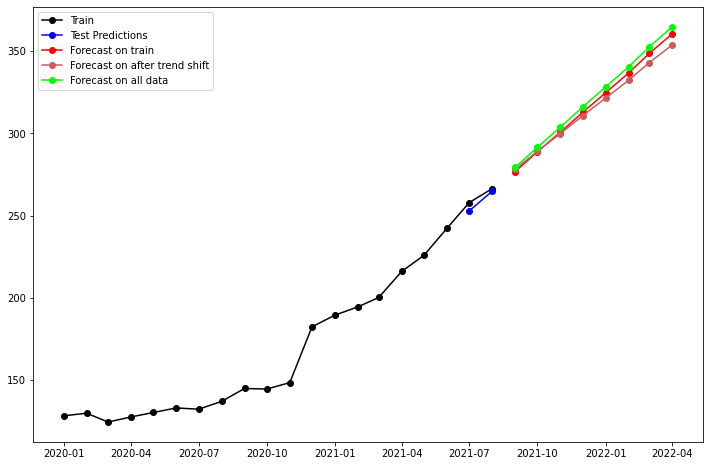

In [700]:
plt.figure(figsize=(12, 8))
plt.plot(link2, marker="o", color="black", label = 'Train')
plt.plot(testpred['MaxUtil Link 2'], marker = 'o', color="blue", label = 'Test Predictions')
plt.plot(telkomtest['MaxUtil Link 2'], marker = 'o', color="red", label = 'Forecast on train')
plt.plot(telkomtestcut['MaxUtil Link 2'], marker = 'o', color="indianred", label = 'Forecast on after trend shift')
plt.plot(telkomtestfinal['MaxUtil Link 2'], marker = 'o', color="lime", label = 'Forecast on all data')
plt.legend()

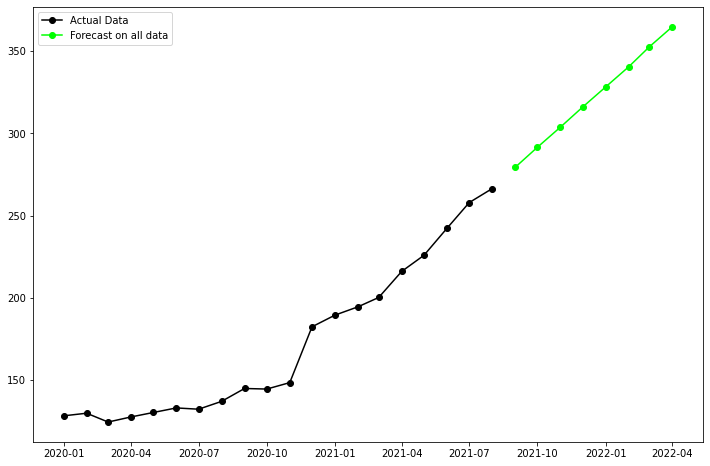

In [701]:
plt.figure(figsize=(12, 8))
plt.plot(link2, marker="o", color="black", label = 'Actual Data')
plt.plot(telkomtestfinal['MaxUtil Link 2'], marker = 'o', color="lime", label = 'Forecast on all data')
plt.legend()

In [702]:
telkomtestfinal

,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
Date,,,,
2021-09-01,445.476848,0,279.368324,0
2021-10-01,457.753696,0,291.590231,0
2021-11-01,470.030545,0,303.812138,0
2021-12-01,482.307393,0,316.034045,0
2022-01-01,494.584241,0,328.255952,0
2022-02-01,506.861089,0,340.477859,0
2022-03-01,519.137937,0,352.699767,0
2022-04-01,531.414786,0,364.921674,0


In [703]:
telkomtestf = pd.concat([telkom, telkomtestfinal])
telkomtestf.reset_index(inplace=True)

In [704]:
# telkomtestf['shift 1'] = telkomtestf['Capacity 1'].shift(1)
# telkomtestf['shift 2'] = telkomtestf['Capacity 2'].shift(1)
# telkomtestf

In [719]:
def calc_cap_and_perc(df, util, cap, link, outputcolname):
  import numpy as np
  df[outputcolname] = 0.0
  df[link] = df[cap].shift(1)
  for index, row in df.iterrows():
    for i in range(0, len(df)):
    #calculate percentage use and capacity
      if np.isnan(df[link][i]) == True:
        df[outputcolname][i] = 0
      elif np.isnan(df[link][i]) == False:
        df[outputcolname][i] = df[util][i]/df[link][i]
        if df[outputcolname][i] >= 0.75:
          df[link][i] += 100
      if df[link][i] > df[cap][i]:
          df[cap][i] = df[link][i]
  df.drop([link, outputcolname], axis=1, inplace=True)
  return df

In [720]:
calc_cap_and_perc(telkomtestf, 'MaxUtil Link 1', 'Capacity 1', 'shift 1', 'CapPerc1')
calc_cap_and_perc(telkomtestf, 'MaxUtil Link 2', 'Capacity 2', 'shift 2', 'CapPerc2')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Date,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
0,2020-01-01,199.940000,300,128.210000,200
1,2020-02-01,198.010000,300,129.800000,200
2,2020-03-01,197.190000,300,124.440000,200
3,2020-04-01,206.930000,300,127.550000,200
4,2020-05-01,228.660000,400,130.250000,200
5,2020-06-01,236.450000,400,133.020000,200
6,2020-07-01,240.900000,400,132.240000,200
7,2020-08-01,248.150000,400,137.000000,200
8,2020-09-01,253.590000,400,144.850000,200
9,2020-10-01,258.565000,400,144.500000,200


In [721]:
telkomtestf.tail(8)

,Date,MaxUtil Link 1,Capacity 1,MaxUtil Link 2,Capacity 2
20,2021-09-01,445.476848,600,279.368324,400
21,2021-10-01,457.753696,700,291.590231,400
22,2021-11-01,470.030545,700,303.812138,500
23,2021-12-01,482.307393,700,316.034045,500
24,2022-01-01,494.584241,700,328.255952,500
25,2022-02-01,506.861089,700,340.477859,500
26,2022-03-01,519.137937,700,352.699767,500
27,2022-04-01,531.414786,800,364.921674,500


In [ ]:
# def calc_cap_and_perc(df, util, cap, link):
#   import numpy as np
#   perc = []
#   df[link] = df[cap].shift(1)
#   for index, row in df.iterrows():
#     for i in range(0, len(df)):
#     #calculate percentage use and capacity
#       if np.isnan(df[link][i]) == True:
#         perc.append(0)
#       elif np.isnan(df[link][i]) == False:
#         perc.append(df[util][i]/df[link][i])
#         if perc[i] >= 0.75:
#           df[link][i] += 100
#       if df[link][i] > df[cap][i]:
#           df[cap][i] = df[link][i]
#   return df

In [ ]:
# def calc_cap_and_perc(df, util, cap, link, outputcolname):
#   import numpy as np
#   df[outputcolname] = 0.00
#   for index, row in df.iterrows():
#     for i in range(0, len(df)):
#     #calculate percentage use and capacity
#       if np.isnan(df[link][i]) == True:
#         df[outputcolname][i] = 0
#       elif np.isnan(df[link][i]) == False:
#         df[outputcolname][i] = df[util][i]/df[link][i]
#         if df[outputcolname][i] >= 0.75:
#           df[link][i] += 100
#       if df[link][i] > df[cap][i]:
#           df[cap][i] = df[link][i]
#   return df

In [ ]:
# telkomtestf['CapPerc1'] = 0.00
# telkomtestf['CapPerc2'] = 0.00
# telkomtestf['Capacity 1 Shift'] = telkomtestf['Capacity 1'].shift(1)
# telkomtestf['Capacity 2 Shift'] = telkomtestf['Capacity 2'].shift(1)
# for index, row in telkomtestf.iterrows():
#   for i in range(0, len(telkomtestf)):
#     #impute cap 1 percentage, shift, and capacity 1
#     if np.isnan(telkomtestf['Capacity 1 Shift'][i]) == True:
#       telkomtestf['CapPerc1'][i] = 0
#     elif np.isnan(telkomtestf['Capacity 1 Shift'][i]) == False:
#       telkomtestf['CapPerc1'][i] = telkomtestf['MaxUtil Link 1'][i]/telkomtestf['Capacity 1 Shift'][i]
#       if telkomtestf['CapPerc1'][i] >= 0.75:
#         telkomtestf['Capacity 1 Shift'][i] += 100
#     if telkomtestf['Capacity 1 Shift'][i] > telkomtestf['Capacity 1'][i]:
#       telkomtestf['Capacity 1'][i] = telkomtestf['Capacity 1 Shift'][i]
#     #impute cap 2 percentage, shift, and capacity 2
#     if np.isnan(telkomtestf['Capacity 2 Shift'][i]) == True:
#       telkomtestf['CapPerc2'][i] = 0
#     elif np.isnan(telkomtestf['Capacity 2 Shift'][i]) == False:
#       telkomtestf['CapPerc2'][i] = telkomtestf['MaxUtil Link 2'][i]/telkomtestf['Capacity 2 Shift'][i]
#       if telkomtestf['CapPerc2'][i] >= 0.75:
#         telkomtestf['Capacity 2 Shift'][i] += 100
#     if telkomtestf['Capacity 2 Shift'][i] > telkomtestf['Capacity 2'][i]:
#       telkomtestf['Capacity 2'][i] = telkomtestf['Capacity 2 Shift'][i]

In [ ]:
# telkomtestcutf = pd.concat([telkom, telkomtestcut])
# telkomtestcutf.reset_index(inplace=True)

In [ ]:
# telkomtestcutf['CapPerc1'] = 0.00
# telkomtestcutf['CapPerc2'] = 0.00
# for index, row in telkomtestcutf.iterrows():
#   for i in range(0, len(telkomtestcutf)):
#     #impute cap 1 percentage, shift, and capacity 1
#     if np.isnan(telkomtestcutf['Capacity 1 Shift'][i]) == True:
#       telkomtestcutf['CapPerc1'][i] = 0
#     elif np.isnan(telkomtestcutf['Capacity 1 Shift'][i]) == False:
#       telkomtestcutf['CapPerc1'][i] = telkomtestcutf['MaxUtil Link 1'][i]/telkomtestcutf['Capacity 1 Shift'][i]
#       if telkomtestcutf['CapPerc1'][i] >= 0.75:
#         telkomtestcutf['Capacity 1 Shift'][i] += 100
#     if telkomtestcutf['Capacity 1 Shift'][i] > telkomtestcutf['Capacity 1'][i]:
#       telkomtestcutf['Capacity 1'][i] = telkomtestcutf['Capacity 1 Shift'][i]
#     #impute cap 2 percentage, shift, and capacity 2
#     if np.isnan(telkomtestcutf['Capacity 2 Shift'][i]) == True:
#       telkomtestcutf['CapPerc2'][i] = 0
#     elif np.isnan(telkomtestcutf['Capacity 2 Shift'][i]) == False:
#       telkomtestcutf['CapPerc2'][i] = telkomtestcutf['MaxUtil Link 2'][i]/telkomtestcutf['Capacity 2 Shift'][i]
#       if telkomtestcutf['CapPerc2'][i] >= 0.75:
#         telkomtestcutf['Capacity 2 Shift'][i] += 100
#     if telkomtestcutf['Capacity 2 Shift'][i] > telkomtestcutf['Capacity 2'][i]:
#       telkomtestcutf['Capacity 2'][i] = telkomtestcutf['Capacity 2 Shift'][i]

In [722]:
telkomtestf.tail(8).to_csv('/content/telkomforecast.csv')